# GHCN data
## Averages
Checking averages

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2
import src.ghcn as ghcn

In [4]:
%%time
full_temp_df = pd.read_csv("./../data/ghcn_temps.csv")

CPU times: user 32.4 s, sys: 2.2 s, total: 34.6 s
Wall time: 36 s


In [5]:
%%time
full_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37122601 entries, 0 to 37122600
Data columns (total 10 columns):
Unnamed: 0    int64
ID            object
YEAR          int64
MONTH         int64
ELEMENT       object
var           object
temp_c        int64
day           int64
temp_f        float64
date          object
dtypes: float64(1), int64(5), object(4)
memory usage: 10.6 GB
CPU times: user 1min 59s, sys: 6.27 ms, total: 1min 59s
Wall time: 1min 59s


In [6]:
%%time
avg_temp_df = full_temp_df.groupby(["date","ELEMENT"], as_index = False).agg({"temp_f": "mean"})

CPU times: user 4.27 s, sys: 216 ms, total: 4.49 s
Wall time: 4.49 s


In [7]:
len(avg_temp_df)

136618

In [8]:
avg_temp_df.head()

,date,ELEMENT,temp_f
0,1833-01-02,TMAX,29.48
1,1833-01-02,TMIN,23.36
2,1833-01-03,TMAX,26.42
3,1833-01-03,TMIN,19.76
4,1833-01-04,TMAX,24.98


In [9]:
%%time
avg_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136618 entries, 0 to 136617
Data columns (total 3 columns):
date       136618 non-null object
ELEMENT    136618 non-null object
temp_f     136618 non-null float64
dtypes: float64(1), object(2)
memory usage: 18.8 MB
CPU times: user 249 ms, sys: 0 ns, total: 249 ms
Wall time: 249 ms


In [10]:
avg_temp_df[avg_temp_df.date == "1990-01-01"]

,date,ELEMENT,temp_f
114684,1990-01-01,TMAX,47.299196
114685,1990-01-01,TMIN,31.151620


In [11]:
avg_temp_df[avg_temp_df.date == "2010-01-01"]

,date,ELEMENT,temp_f
129294,2010-01-01,TMAX,44.085156
129295,2010-01-01,TMIN,27.173635


In [12]:
avg_temp_df["month_day"] = avg_temp_df.date.str.split("-").map(lambda x: "-".join(x[1:]))
avg_temp_df["month"] = avg_temp_df.date.str.split("-").map(lambda x: x[1]).astype(int)
avg_temp_df["year"] = avg_temp_df.date.str.split("-").map(lambda x: x[0]).astype(int)

In [13]:
avg_temp_df.head()

,date,ELEMENT,temp_f,month_day,month,year
0,1833-01-02,TMAX,29.48,01-02,1,1833
1,1833-01-02,TMIN,23.36,01-02,1,1833
2,1833-01-03,TMAX,26.42,01-03,1,1833
3,1833-01-03,TMIN,19.76,01-03,1,1833
4,1833-01-04,TMAX,24.98,01-04,1,1833


In [18]:
for typ in ["min", "max"]:
    avg_temp_df["day_{}".format(typ)] = avg_temp_df.merge(
        right = avg_temp_df.groupby(
            ["month_day", "ELEMENT"],
            as_index = False).agg(
            {"temp_f": typ}).rename(
            columns = {"temp_f": "temp_f_{}".format(typ)}),
        on = ["month_day", "ELEMENT"],
        how = "left")["temp_f_{}".format(typ)]

In [19]:
avg_temp_df.head()

,date,ELEMENT,temp_f,month_day,month,year,day_max,day_min
0,1833-01-02,TMAX,29.48,01-02,1,1833,64.40,16.379289
1,1833-01-02,TMIN,23.36,01-02,1,1833,48.32,-1.473165
2,1833-01-03,TMAX,26.42,01-03,1,1833,60.74,15.440000
3,1833-01-03,TMIN,19.76,01-03,1,1833,46.43,-3.124231
4,1833-01-04,TMAX,24.98,01-04,1,1833,56.06,15.384545


In [20]:
avg_temp_df["norm_temp_f"] = (avg_temp_df.temp_f - avg_temp_df.day_min)/(avg_temp_df.day_max - avg_temp_df.day_min)

In [21]:
avg_temp_df.head()

,date,ELEMENT,temp_f,month_day,month,year,day_max,day_min,norm_temp_f
0,1833-01-02,TMAX,29.48,01-02,1,1833,64.40,16.379289,0.272814
1,1833-01-02,TMIN,23.36,01-02,1,1833,48.32,-1.473165,0.498726
2,1833-01-03,TMAX,26.42,01-03,1,1833,60.74,15.440000,0.242384
3,1833-01-03,TMIN,19.76,01-03,1,1833,46.43,-3.124231,0.461802
4,1833-01-04,TMAX,24.98,01-04,1,1833,56.06,15.384545,0.235903


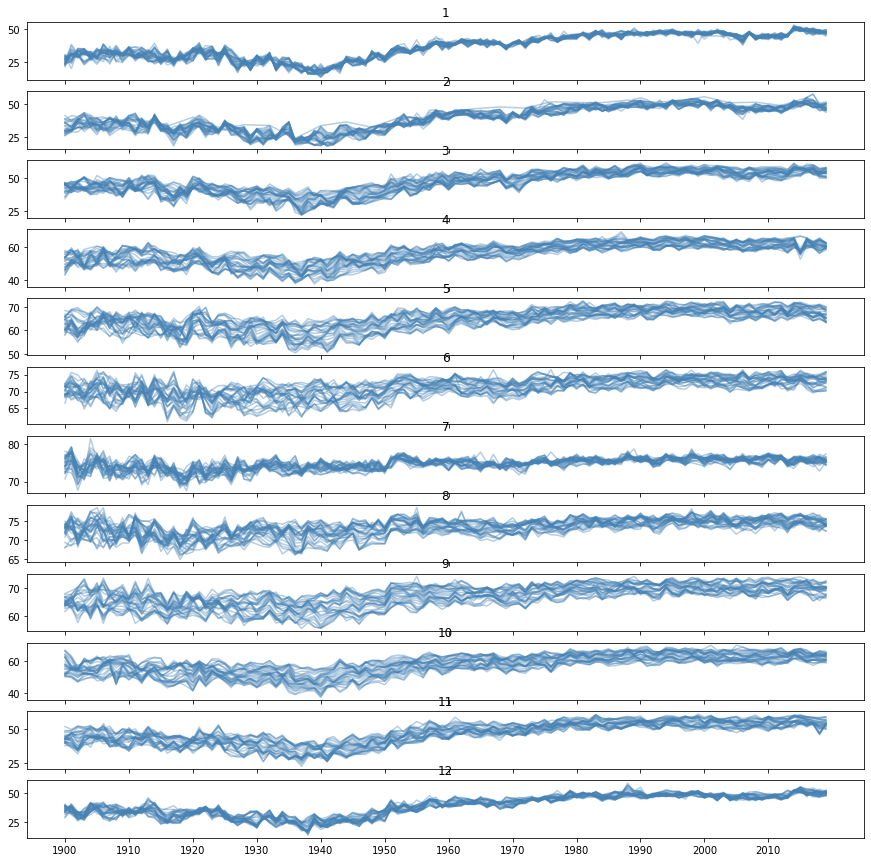

In [15]:
fig, ax = plt.subplots(figsize = (15, 15), nrows = 12, sharex = True)
element = "TMAX"
min_year = 1900
max_year = 2019
for month in avg_temp_df.month.unique():
    month_avg_temps = avg_temp_df[(avg_temp_df.month == month) & (avg_temp_df.ELEMENT == element) & (avg_temp_df.year >= min_year) & (avg_temp_df.year <= max_year)]
    for month_day in month_avg_temps.month_day.unique():
        month_day_avg_temps = month_avg_temps[month_avg_temps.month_day == month_day]
        ax[month - 1].plot(month_day_avg_temps.year, month_day_avg_temps.temp_f, color = "steelblue", alpha = 0.4)
    ax[month -1].set_title(month)
ax[0].set_xticks(range(1900, max_year + 1, 10));

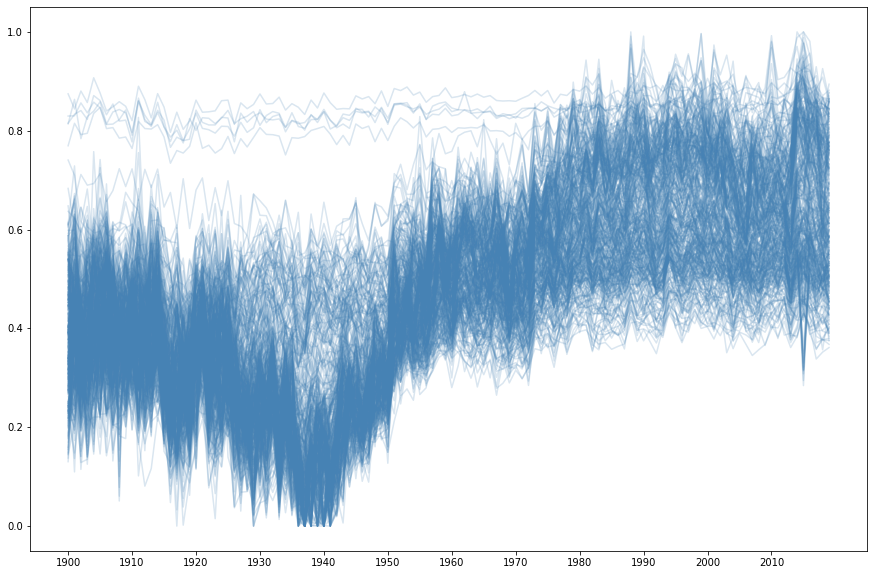

In [23]:
fig, ax = plt.subplots(figsize = (15, 10))
element = "TMAX"
min_year = 1900
max_year = 2019
for month_day in avg_temp_df.month_day.unique():
    month_day_avg_temps = avg_temp_df[
        (avg_temp_df.month_day == month_day) &\
        (avg_temp_df.ELEMENT == element) &\
        (avg_temp_df.year >= min_year) &\
        (avg_temp_df.year <= max_year)]
    ax.plot(month_day_avg_temps.year, month_day_avg_temps.norm_temp_f, color = "steelblue", alpha = 0.2)
ax.set_xticks(range(1900, max_year + 1, 10));